# CS 452/552 Data Science with Python: Homework 3

Download data files from LMS. Code/Explain your solution over this `IPython` notebook at required cells, and complete locally.

To submit your assignment, in LMS, upload your solution to LMS as a single notebook with following file name format:

`lastName_firstName_CourseNumber_HW3.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 452 or CS 552).

Problems on homework assignments are equally weighted. `The Challenge Question is required for CS 552 students and optional for all others.`

Any type of plagiarism will not be tolerated. Your submitted codes will be compared with other submissions and also the codes available on internet and violations will have a penalty of -100 points. (In case of copying from
another student both parties will get -100)

Import libraries

In [81]:
#Import libraries before starting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import Lasso, Ridge, RidgeCV, LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Variable selection and regularization

The data set for this problem is provided in ``dataset_1.txt`` and contains 10 predictors and a response variable.

### Part (a): Analyze correlation among predictors
- By visually inspecting the data set, do find that some of the predictors are correlated amongst themselves?


- Compute the cofficient of correlation between each pair of predictors, and visualize the matrix of correlation coefficients using a heat map. Do the predictors fall naturally into groups based on the correlation values?


- If you were asked to select a minimal subset of predictors based on the correlation information in order to build a good regression model, how many predictors will you pick, and which ones will you choose? 

**Solution:**

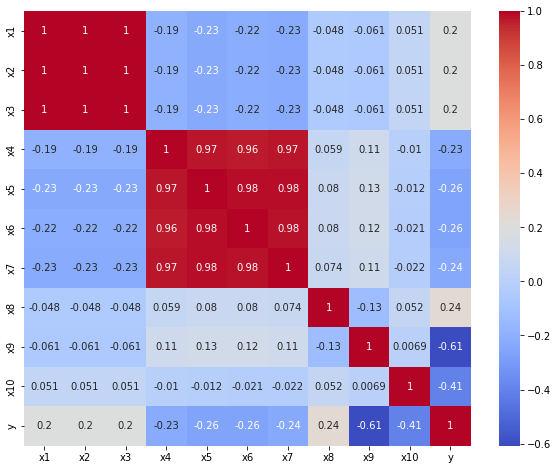

In [2]:
#Code here
data = pd.read_csv('datasets/dataset_1.txt')
corr_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [3]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.959357,0.959357,0.959357,0.343727,0.524083,0.537768,0.435598,0.831999,0.153247,0.005016,0.289394
1,0.616969,0.616969,0.616969,0.287376,0.513844,0.497775,0.452732,0.914609,0.367390,0.444473,-0.277574
2,0.995941,0.995941,0.995941,0.107294,0.097106,0.146751,0.136414,0.635926,0.535209,0.899457,-0.513097
3,0.821732,0.821732,0.821732,0.202558,0.329504,0.359471,0.281453,0.106263,0.479327,0.256271,-0.182353
4,0.302423,0.302423,0.302423,0.184564,0.270263,0.293385,0.263866,0.378630,0.740241,0.468589,-0.625117


**Explanation:**

From the above correlation matrix, we can clearly see that Blue cells in the map indicate negative correlation, while red cells indicate positive correlation. The darker the color, the stronger the correlation<br><br>
The predictiors that naturally fall into groups are: (x1,x2,x3) and (x4,x5,x6,x7) as they are highly correlated with each other<br><br>
If we had to build a linear regression model from these predictiors, I would pick subsets of (x1,x2,x3), (x4,x5,x6,x7), (x8), (x9), (x10) which makes a total of 5 variables 

### Part (b): Selecting minimal subset of predictors

- Apply the variable selection methods discussed in class to choose a minimal subset of predictors that yield high prediction accuracy:
    
    - Exhaustive search
    
    - Step-wise forward selection **or** Step-wise backward selection  

&emsp;&nbsp;&nbsp; In each method, use the Bayesian Information Criterion (BIC) to choose the subset size.

- Do the chosen subsets match the ones you picked using the correlation matrix you had visualized in Part (a)?

**Note**: You may use the `statsmodels`'s `OLS` module to fit a linear regression model and evaluate BIC. You may **not** use library functions that implement variable selection.

**Solution:**

In [4]:
def get_combinations(lst):
    combinations = []
    for i in range(1, len(lst) + 1):
        if i == 1:
            for j in lst:
                combinations.append([j])
        else:
            new_combinations = []
            for combo in combinations:
                for j in [x for x in lst if x not in combo]:
                    new_combo = combo + [j]
                    new_combo.sort()  # Sorting to avoid duplicate combinations
                    if new_combo not in combinations and new_combo not in new_combinations:
                        new_combinations.append(new_combo)
            combinations += new_combinations
    return combinations

def exhaustive_search(data, response):
    predictors = data.columns.tolist()
    predictors.remove(response)
    
    combinations = get_combinations(predictors)
    
    best_bic = np.inf
    best_model = None
    
    for combo in combinations:
        model = sm.OLS(data[response], sm.add_constant(data[combo])).fit()
        bic = model.bic
        if bic < best_bic:
            best_bic = bic
            best_model = model
            
    return best_model

def forward_selection(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    best_bic = np.inf
    
    while remaining:
        bic_with_candidates=[]
        for candidate in remaining:
            model = sm.OLS(data[response], sm.add_constant(data[selected+[candidate]])).fit()
            bic_with_candidates.append((model.bic, candidate))
        
        bic_with_candidates.sort()
        best_new_score, best_candidate = bic_with_candidates[0]
        
        if best_new_score < best_bic:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            best_bic = best_new_score
        else:
            break
    return selected

print('exhaustive search selection best subsets selected:')
best_model_exhaustive = exhaustive_search(data, 'y')
print(best_model_exhaustive.summary())

best_predictors_forward = forward_selection(data, 'y')
print(f'\n\nforward selection best subsets selected: {sorted(best_predictors_forward)}')

exhaustive search selection best subsets selected:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     32.40
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           4.59e-19
Time:                        14:18:28   Log-Likelihood:                 49.999
No. Observations:                 100   AIC:                            -88.00
Df Residuals:                      94   BIC:                            -72.37
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

**Explanation:**

Both Models selected: (x1 , x6, x8, x9, x10)<br>
My model selections: ((x1,x2,x3), (x4,x5,x6,x7), x8, x9, x10)<br>
which is very similar to each other


### Part (c): Apply Lasso and Ridge regression

- Apply Lasso regression with regularization parameter $\lambda = 0.01$ and fit a regression model.

    - Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


- Apply Ridge regression with regularization parameter $\lambda = 0.01$ and fit a regression model.

    - Is there a difference between the model parameters you obtain different and those obtained from Lasso regression? If so, explain why.

    - Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


- Is there anything peculiar that you observe about the coefficients Ridge regression assigns to the first three predictors? Do you observe the same with Lasso regression? Give an explanation for your observation.

**Note**: You may use the `statsmodels` or `sklearn` to perform Lasso and Ridge regression.

**Solution:**

In [5]:
lasso = Lasso(alpha=0.01)

print("Lasso:")
X = data.drop(columns=['y']) 
y = data['y']  
lasso.fit(X, y)

lasso_coef = pd.DataFrame({'Predictor': X.columns, 'Coefficient': lasso.coef_})
print(lasso_coef)
print("\n Ridge:")

ridge = Ridge(alpha=0.01)

ridge.fit(X, y)

ridge_coef = pd.DataFrame({'Predictor': X.columns, 'Coefficient': ridge.coef_})
print(ridge_coef)

Lasso:
  Predictor   Coefficient
0        x1  2.717417e-02
1        x2  5.743658e-17
2        x3  0.000000e+00
3        x4 -0.000000e+00
4        x5 -2.532806e-02
5        x6 -0.000000e+00
6        x7 -0.000000e+00
7        x8  4.397321e-02
8        x9 -4.061219e-01
9       x10 -2.226047e-01

 Ridge:
  Predictor  Coefficient
0        x1     0.043535
1        x2     0.043535
2        x3     0.043535
3        x4     0.552174
4        x5    -0.197069
5        x6    -0.614217
6        x7     0.304842
7        x8     0.187429
8        x9    -0.500832
9       x10    -0.359081


**Explanation:**

From what we know, the working of lasso and ridge regression is the following:
1. Lasso can set some coefficients to zero, effectively selecting a simpler model if some predictors are not contributing much to the response variable.
2. Ridge, on the other hand, doesn't set coefficients to zero but minimizes their values. It tends to perform better when most predictors impact the response.

from the above models, and their coffients, we can clearly see that:
1. For lasso model the coeffeciants that are 0 are x3, x4, x6, x7 which means these variables arent contributing to the output which leaves us with (x1, x2, x5, x8, x9, x10) which is similar to the correlation matrix

2. For ridge model we observe that x1, x2, x3 have the same coeffeciant, this makes sense because they have same impact on the response just as we observed in the correlation matrix. Other than that, its selections are different from correlation matrix

## Problem 2: Cross-validation and Bootstrapping
In this problem, you will work with an expanded version of the automobile pricing data set you analyzed in Homework 3. The data set is contained ``dataset_2.txt``, with 26 attribues (i.e. predictors) for each automobile and corresponding prices. 

### Part(a): Encode categorical attributes and fill missing values
Identify the categorical attributes in the data. Replace their values with the one-hot binary encoding. You may do this using the `get_dummies()` function in `pandas`. If you do this task correctly, you should get a total of 69 predictors after the encoding.


**Solution:**

In [42]:
data = pd.read_csv('datasets/dataset_2.txt')

attributes = data.drop('price', axis=1) # select everything but the last column 

attributes['symboling'] = attributes['symboling'].astype(object)

categorical_vars = list(set(attributes.select_dtypes(include=['object']).columns))
numerical_vars = list(set(attributes.columns) - set(categorical_vars))

categorical_encoded = pd.get_dummies(attributes[categorical_vars], drop_first=False)

data_encoded = pd.concat([attributes[numerical_vars], categorical_encoded], axis=1)

print("Total number of predictors: ", data_encoded.shape[1])


Total number of predictors:  69


### Part (b): Apply regular linear regression
- Split the data set into train and test sets, with the first 25% of the data for training and the remaining for testing.  


- Use regular linear regression to fit a model to the training set and evaluate the R^2 score of the fitted model on both the training and test sets. What do you observe about these values?


- You had seen in class that the R^2 value of a least-squares fit to a data set would lie between 0 and 1. Is this true for the test R^2 values reported above? If not, give a reason for why this is the case.


- Is there a need for regularization while fitting a linear model to this data set?

**Note**: You may use the `statsmodels` or `sklearn` to fit a linear regression model and evaluate the fits.

**Solution:**

In [44]:
X = data_encoded
y = data['price']

split_index = int(len(X) * 0.25)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training R^2: ", r2_train)
print("Test R^2: ", r2_test)

Training R^2:  1.0
Test R^2:  -5.975425566998002


**Explanation:**

The discrepancy between the training R^2 (1.0) and the test R^2 (-5.98) is quite large. A training R^2 of 1.0 indicates a perfect fit to the training data, which is suspicious and typically a sign of overfitting. The model is likely too complex and is capturing the noise in the training data. When applied to the test data, the model performs poorly, leading to a negative R^2 score.

In this case, regularization is indeed necessary. Regularization techniques like Ridge and Lasso regression can help to prevent overfitting by adding a penalty term to the loss function that effectively reduces the complexity of the model. This can result in a model that generalizes better to unseen data.

### Part (c): Apply Ridge regression

- Apply Ridge regression on the training set for different values of the regularization parameter $\lambda$ in the range $\{10^{-7}, 10^{-6}, \ldots, 10^7\}$. Evaluate the R^2 score for the models you obtain on both the train and test sets. Plot both values as a function of $\lambda$. 


- Explain the relationship between the regularization parameter and the training and test R^2 scores.


- How does the best test R^2 value obtained using Ridge regression compare with that of plain linear regression? Explain.

**Note**: You may use the `statsmodels` or `sklearn` to fit a ridge regression model and evaluate the fits.

**Solution:**

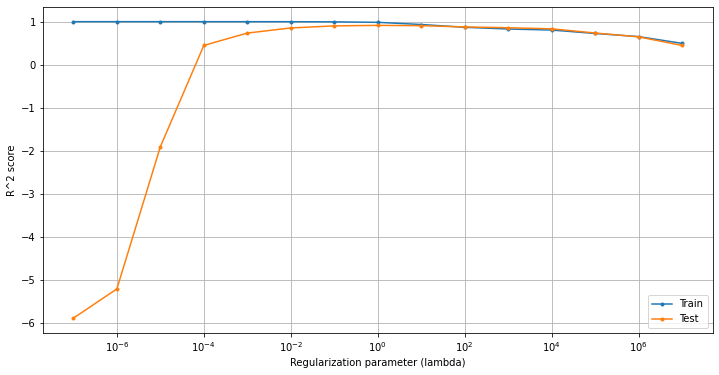

In [79]:
lambdas = np.logspace(-7, 7, 15)

train_scores = []
test_scores = []

for lambda_val in lambdas:
    
    model = Ridge(alpha=lambda_val)
    model.fit(X_train, y_train)
    
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(12, 6))
plt.plot(lambdas, train_scores, '.-', label='Train')
plt.plot(lambdas, test_scores, '.-', label='Test')
plt.xscale('log')
plt.xlabel('Regularization parameter (lambda)')
plt.ylabel('R^2 score')
plt.legend()
plt.grid()
plt.show()

In [80]:
print(train_scores)
print(test_scores)

[0.9999999885793291, 0.9999989835928244, 0.9999586165546838, 0.9998049342587668, 0.9997098754740815, 0.9992749505239692, 0.9959573431855552, 0.9844593349481067, 0.9340962039871474, 0.8690177030752627, 0.8293773690490698, 0.804869844816186, 0.7259301203848338, 0.6526852596221886, 0.4954720372374587]
[-5.892290002206542, -5.21205361762919, -1.907738453624927, 0.44740083970598477, 0.7347636711173469, 0.8541461067448167, 0.9020978829798292, 0.9135351202697081, 0.9072276147332603, 0.8785089039948774, 0.8582976111004125, 0.8337718064452163, 0.7365490715069032, 0.6465941099163208, 0.44743355426617426]


**Explanation:**

R^2 score varies with different regularization parameters (λ) for both the training and test data sets. As expected, the training score decreases with increasing λ, reflecting the increasing regularization penalty that discourages overfitting.

The test scores also behave as expected. Initially, when λ is small, the model is overfitting the training data, leading to poor generalization to the test data, hence the negative R^2 scores. As λ increases, the model becomes less prone to overfitting, improving the test R^2 scores.

However, after reaching a peak at λ around 10^1, the test R^2 score starts to decrease again. This is a sign of underfitting: the model is becoming too simple to capture the underlying structure of the data.

The best test R^2 score using Ridge regression (around 0.91) is significantly better than the test R^2 score from plain linear regression (-5.98).

### Part (d): Tune regularization parameter using cross-validation and bootstrapping
-  Evaluate the performance of the Ridge regression for different regularization parameters $\lambda$ using 5-fold cross validation **or** bootstrapping on the training set. 

    - Plot the cross-validation (CV) or bootstrapping R^2 score as a function of $\lambda$. 
    
    - How closely does the CV score or bootstrapping score match the R^2 score on the test set? Does the model with lowest CV score or bootstrapping score correspond to the one with maximum R^2 on the test set?
    
    - Does the model chosen by CV or bootstrapping perform better than plain linear regression?

**Note**: You may use the `statsmodels` or `sklearn` to fit a linear regression model and evaluate the fits. You may also use `kFold` from `sklearn.cross_validation`. 

**Solution:**

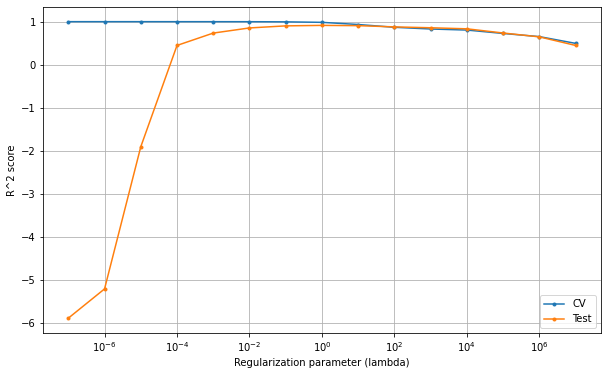

In [85]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

lambdas = np.logspace(-7, 7, 15)

cv_scores = []
test_scores = []

for lambda_ in lambdas:
    model = RidgeCV(alphas=[lambda_], cv=kfold, scoring='neg_mean_squared_error')
    model.fit(X_train, y_train)
    
    cv_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(lambdas, cv_scores, '.-', label='CV')
plt.plot(lambdas, test_scores, '.-', label='Test')
plt.xscale('log')
plt.xlabel('Regularization parameter (lambda)')
plt.ylabel('R^2 score')
plt.legend()
plt.grid()
plt.show()

In [86]:
print(test_scores)
print(cv_scores)

[-5.892290002206542, -5.21205361762919, -1.907738453624927, 0.44740083970598477, 0.7347636711173469, 0.8541461067448167, 0.9020978829798292, 0.9135351202697081, 0.9072276147332603, 0.8785089039948774, 0.8582976111004125, 0.8337718064452163, 0.7365490715069032, 0.6465941099163208, 0.44743355426617426]
[0.9999999885793291, 0.9999989835928244, 0.9999586165546838, 0.9998049342587668, 0.9997098754740815, 0.9992749505239692, 0.9959573431855552, 0.9844593349481067, 0.9340962039871474, 0.8690177030752627, 0.8293773690490698, 0.804869844816186, 0.7259301203848338, 0.6526852596221886, 0.4954720372374587]


**Explanation:**

The results indicate that the cross-validation (CV) scores and test scores follow a similar trend to what was observed in Part (c). The CV scores start very high with a lower regularization parameter (λ), and decrease as λ increases, demonstrating that the model is becoming less overfit to the training data.

The test scores also improve from a negative score with low λ (indicating overfitting) to a peak around 0.91 with a λ of around 10^1, before decreasing again as the λ increases further. This decrease in test score with larger λ indicates underfitting, where the model is too simple to capture the complexity of the data.

Looking at these results, the model with the highest test R^2 score (0.91) doesn't exactly correspond to the model with the highest CV score (which happens at much lower λ values). However, both indicate that some level of regularization improves the model's performance on the test set compared to plain linear regression.

## Problem 3: Ridge regression *via* ordinary least-squares regression

We present an approach to implement Ridge regression using oridinary least-squares regression. Given a matrix of responses $\mathbf{X} \in \mathbb{R}^{n\times p}$ and response vector $\mathbf{y} \in \mathbb{R}^{n}$, one can implement Ridge regression with regularization parameter $\lambda$ as follows:

- Augment the matrix of predictors $\mathbf{X}$ with $p$ new rows containing the scaled identity matrix $\sqrt{\lambda}\mathbf{I} \in \mathbb{R}^{p \times p}$, i.e.
$$\overline{\mathbf{X}} \,=\, 
\begin{bmatrix}
X_{11} & \ldots & X_{1p}\\
\vdots & \ddots & \vdots\\
X_{n1} & \ldots & X_{np}\\
\sqrt{\lambda} & \ldots & 0\\
\vdots & \ddots & \vdots\\
0 & \ldots & \sqrt{\lambda}
\end{bmatrix}
\,\in\,
\mathbb{R}^{(n+p)\times p}
.
$$


- Augment the response vector $\mathbf{y}$ with a column of $p$ zeros, i.e.
$$
\overline{\mathbf{y}} \,=\, 
\begin{bmatrix}
y_{1}\\
\vdots\\
y_{n}\\
0\\
\vdots\\
0
\end{bmatrix}
\,\in\,
\mathbb{R}^{n+p}.
$$


- Apply ordinary least-squares regression on the augmented data set $(\overline{\mathbf{X}}, \overline{\mathbf{y}})$.

### Part (a): Show the proposed approach implements Ridge regression
Show that the approach proposed above implements Ridge regression with parameter $\lambda$.

**Explanation:**

n Ridge Regression, we try to minimize the following objective function:

L = ||y - Xβ||² + λ||β||².

Here, the first term is the residual sum of squares (RSS) which we try to minimize in ordinary least squares regression (OLS), and the second term is the regularization term which penalizes the magnitude of the coefficients β.

Now let's consider the augmented data set as described in your proposal. The augmented X (denoted 𝐗̄) is X augmented with sqrt(λ) times the identity matrix, and the augmented y (denoted 𝐲̄) is y augmented with a zero vector.

If we try to minimize the residual sum of squares (RSS) for the augmented data, we get:

L' = ||𝐲̄ - 𝐗̄β||² = ||y - Xβ||² + ||sqrt(λ)β||².

This L' is actually the same as the original Ridge objective function L. The term ||sqrt(λ)β||² equals λ||β||², so it acts as a Ridge penalty term.

This proves that applying OLS to the augmented data set (𝐗̄, 𝐲̄) is equivalent to applying Ridge Regression with parameter λ to the original data set (X, y).

## Challenge Problem (only for 552 students): Predicting Outcome of a Fund-raising Campaign
You are provided a data set containing details of mail sent to 95,412 potential donors for a fund-raising campaign of a not-for-profit organization. This data set also contains the amount donated by each donor. The task is to build a model that can estimate the amount that a donor would donate using his/her attributes. The data is contained in the file `dataset_4.txt`. Each row contains 376 attributes for a donor, followed by the donation amount.

**Note**: For additional information about the attributes used, please look up the file `dataset_4_description.txt`. This files also contains details of attributes that have been omitted from the data set.

### Part (a): Fit regression model
Build a suitable model to predict the donation amount. How good is your model? 


### Part (b): Evaluate the total profit of the fitted model
Suppose you are told that the cost of mailing the donor is \$7. Use your model to maximize profit. Implement, explain and rigorously justify your strategy. How does your strategry compare with blanket mailing everyone.

### Part (c): Further Discussion
In hindsight, thoroughly discuss the appropriatenes of using a regression model for this dataset (you must at least address the suitability with respect to profit maximization and model assumptions). Rigorously justify your reasoning. 

**Solution:**

In [15]:
#Code here

**Explanation:**

In [16]:
#Solution here